In [1]:
import numpy as np
import matplotlib.pyplot as plt
import random
import scipy.integrate as deqsol

## Exercise 1

Today we will analyse the following problem and we will implement it both in a direct way both in a full simulative approach seeing also some time differences. The generic theoretical problem we want to model is:

<em>Let's suppose to have a system that can stay in one of 5 possible states namely $[0,1,2,3,4]$. The transition rates, needed to compute the infinitesimal generator, have to be randomly computed first and the matrix have to be adapted according to these. We want to compute the probability of being in each state given an initial probability distribution $p_0$ after a certain time $T$.</em>

### STEP 1

In [2]:
random.seed(123456)

In [3]:
#FIRSTLY, AS THE LAST TIME, LET'S CREATE A CLASS WITH THE INFINITESIMAL GENERATOR METHOD AND THE GENERATOR CHECK CONDITIONS

class CTMC(object):
    '''Continuous-Time Markov Chain Class'''

    @staticmethod
    def generator_check(M: np.matrix)->None:
        '''
        This method will check if the given generator
        is valid or not.
        '''

        #Let's check first if it's 2D
        if(M.ndim!=2):
            raise RuntimeError("The infinitesimal generator have to be 2D")

        #2. Check if it's a squared matrix
        if(np.shape(M)[0]!=np.shape(M)[1]):
            raise RuntimeError("Number of rows is different from the number of columns")

        #3. Check if the out of diagonal coefficient are positive and if the row sum up to zero
        #NOTE: with the positivity request is equivalent to ask the sum up to the diagonal coeff.
        for i in range(np.shape(M)[0]):
            s = 0
            for j in range(np.shape(M)[1]):
                if(M[i,j]<0 and i!=j): #Out of diagonal
                    print(i,j)
                    raise RuntimeError("The infinitesimal generator has a negative entry")
                s=s+M[i,j]
            if(s>0.0000001): #Row sum up
                print(i)
                raise RuntimeError("The infinitesimal generator has a row that does not sum up to 0")

        return

    def __infinitesimal_generator_maker(self)->np.matrix:
        '''
        This function will make the infinitesimal generator
        for our problem.
        '''
        Q = np.zeros((self.n_states,self.n_states),dtype=float)

        for i in range(self.n_states):
            s = 0.0
            for j in range(self.n_states):
                if(i!=j):
                    Q[i,j] = random.random()
                    s += Q[i,j]
            Q[i,i] = -1.0*s

        return Q

    #CONSTRUCTOR
    def __init__(self,N: int)->None:
        self.n_states= N
        self.inf_generator = self.__infinitesimal_generator_maker()
        self.generator_check(self.inf_generator)
        return

In [4]:
chain = CTMC(5)
print(chain.inf_generator)

[[-1.80376829e+00  8.05627136e-01  7.94059011e-01  2.94257611e-02
   1.74656383e-01]
 [ 2.22987616e-03 -1.01168564e+00  6.63883067e-01  7.70493005e-02
   2.68523395e-01]
 [ 1.16395190e-01  2.29025190e-01 -1.01894287e+00  4.87417585e-01
   1.86104901e-01]
 [ 2.42717976e-02  9.13573609e-01  3.77348206e-01 -1.96195437e+00
   6.46760760e-01]
 [ 3.69956643e-01  8.53996643e-01  7.66786144e-01  4.40198105e-01
  -2.43093753e+00]]


### STEP 2

Now we can solve the Kolmogorov equations using a solver and in this way compute the probability distribution given $p_0$ at a certain time $T$. To do this we will expand the class above

In [5]:
random.seed(123456)

In [6]:
class CTMC(object):
    '''Continuous-Time Markov Chain Class'''

    @staticmethod
    def generator_check(M: np.matrix)->None:
        '''
        This method will check if the given generator
        is valid or not.
        '''

        #Let's check first if it's 2D
        if(M.ndim!=2):
            raise RuntimeError("The infinitesimal generator have to be 2D")

        #2. Check if it's a squared matrix
        if(np.shape(M)[0]!=np.shape(M)[1]):
            raise RuntimeError("Number of rows is different from the number of columns")

        #3. Check if the out of diagonal coefficient are positive and if the row sum up to zero
        #NOTE: with the positivity request is equivalent to ask the sum up to the diagonal coeff.
        for i in range(np.shape(M)[0]):
            s = 0
            for j in range(np.shape(M)[1]):
                if(M[i,j]<0 and i!=j): #Out of diagonal
                    print(i,j)
                    raise RuntimeError("The infinitesimal generator has a negative entry")
                s=s+M[i,j]
            if(s>0.0000001): #Row sum up
                print(i)
                raise RuntimeError("The infinitesimal generator has a row that does not sum up to 0")

        return

    def Kolmogorov_solve(self,p0: np.array,T: float,M: int)->np.array:
        '''
        Given the initial probabiity distribution and the time T
        This function will compute the probability array after
        T seconds a partition of M steps
        '''
        p = np.array(self.n_states,dtype=float)

        #define the system
        def system(y,t):
            p = y
            dydt = np.dot(p,self.inf_generator)
            return dydt

        t = np.linspace(0,T,M)

        sol = deqsol.odeint(system,p0,t) #compute the results

        return sol #The solution has also all the intermediate steps

    def __infinitesimal_generator_maker(self)->np.matrix:
        '''
        This function will make the infinitesimal generator
        for our problem.
        '''
        Q = np.zeros((self.n_states,self.n_states),dtype=float)

        for i in range(self.n_states):
            s = 0.0
            for j in range(self.n_states):
                if(i!=j):
                    Q[i,j] = random.random()
                    s += Q[i,j]
            Q[i,i] = -1.0*s

        return Q

    #CONSTRUCTOR
    def __init__(self,N: int)->None:
        self.n_states= N
        self.inf_generator = self.__infinitesimal_generator_maker()
        self.generator_check(self.inf_generator)
        return

In [7]:
chain = CTMC(5)
p0 = np.array([0.2,0.2,0.2,0.2,0.2])

trajs = chain.Kolmogorov_solve(p0,50.0,40)

print(trajs[-1,:])

[0.04831269 0.33270149 0.38213085 0.13220495 0.10465002]


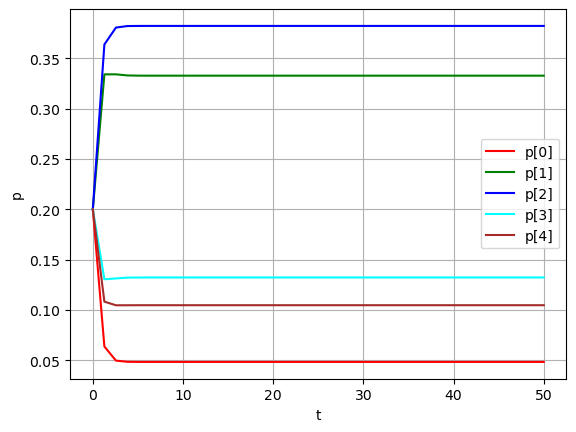

In [8]:
t = np.linspace(0,50.0,40)
plt.plot(t, trajs[:, 0], 'r', label='p[0]')
plt.plot(t, trajs[:, 1], 'g', label='p[1]')
plt.plot(t, trajs[:, 2], 'b', label='p[2]')
plt.plot(t, trajs[:, 3], 'cyan', label='p[3]')
plt.plot(t, trajs[:, 4], 'brown', label='p[4]')
plt.legend(loc='best')
plt.xlabel('t')
plt.ylabel('p')
plt.grid()
plt.show()

## Exercise 2

Ok, now let's try again but this time we will compute the probability in a simulative way. The idea is the same we have used in the Exercise 4 of the last notebook: we will produce $N_sim$ randomizing the initial state and after $T$ time we will collect the state of each simulation to compute the probability distribution.
Obviously we need a method to produce the stochastic trajectories. To do this we will implement the Gillespie - SSA algorithm seen in class.

In [9]:
random.seed(123456)

In [10]:
#AS ALWAYS LET'S PRODUCE A CLASS STARTING FROM THE BASE SEEN BEFORE

class CTMC_SIM(object):
    '''
    Continuous-Time Markov Chain Class
    based on a simulative approach.
    '''

    @staticmethod
    def generator_check(M: np.matrix)->None:
        '''
        This method will check if the given generator
        is valid or not.
        '''

        #Let's check first if it's 2D
        if(M.ndim!=2):
            raise RuntimeError("The infinitesimal generator have to be 2D")

        #2. Check if it's a squared matrix
        if(np.shape(M)[0]!=np.shape(M)[1]):
            raise RuntimeError("Number of rows is different from the number of columns")

        #3. Check if the out of diagonal coefficient are positive and if the row sum up to zero
        #NOTE: with the positivity request is equivalent to ask the sum up to the diagonal coeff.
        for i in range(np.shape(M)[0]):
            s = 0
            for j in range(np.shape(M)[1]):
                if(M[i,j]<0 and i!=j): #Out of diagonal
                    print(i,j)
                    raise RuntimeError("The infinitesimal generator has a negative entry")
                s=s+M[i,j]
            if(s>0.0000001): #Row sum up
                print(i)
                raise RuntimeError("The infinitesimal generator has a row that does not sum up to 0")

        return

    @staticmethod
    def jump_chain_mat_generator(Q: np.matrix)->np.matrix:
        '''
        This function will take a supposed valid
        infinitesimal generator and will produce
        the transition matrix for the associated
        jump chain.
        '''

        n = np.shape(Q)[0]
        J = np.zeros((n,n),dtype=float)

        for i in range(n):
            a = -Q[i,i]
            for j in range(n):
                if(i!=j):
                    J[i,j]=Q[i,j]/a

            J[i,i]=0

        return J

    @staticmethod
    def exp_time(l: float)->float:
        '''
        Given the rate, this function will generate a random time
        exponentially distributed
        '''
        r = random.random()
        n = -np.log(1-r)/l

        return n

    def __infinitesimal_generator_maker(self)->np.matrix:
        '''
        This function will make the infinitesimal generator
        for our problem.
        '''
        Q = np.zeros((self.n_states,self.n_states),dtype=float)

        for i in range(self.n_states):
            s = 0.0
            for j in range(self.n_states):
                if(i!=j):
                    Q[i,j] = random.random()
                    s += Q[i,j]
            Q[i,i] = -1.0*s

        return Q

    #COMPUTE CUMULATIVE PROBABILITY ARRAY
    def __cumulativeTransformer(self,p0:np.array)->np.array:
        '''
        Given a probability array this function will compute
        the cumulative of such distribution.
        '''
        p = np.zeros(len(p0),dtype=float)
        p[0] = p0[0]

        for i in range(1,len(p)):
            p[i] = p0[i] + p[i-1]
        
        return p

    #STATE COMPUTATION
    def __obtainState(self,p0:np.array)->int:
        '''
        Given a probability distribution of the state this function will
        produce a weighted random state.
        '''
        p = self.__cumulativeTransformer(p0)

        r = random.random()
        s = 0
        
        for i in range(len(p0)):
            if((r<p[i]) and (abs(p[i]-p[i-1])>0.0000001)):
                s = i
                break
        return s

    def __simulationSSA(self,p0: np.array,T: float)->int:
        '''
        This function will use the Gillespie-SSA algorithm
        to produce a stochastic trajectory for the CTCM
        '''
        #First thing we need to do is to obtain the transition mat of the jump chain
        P = self.jump_chain_mat

        #Simulate the trajectory
        state_0 = self.__obtainState(p0) #generate the initial state
        time = 0.0 #initialize time

        while(time<T):
            state_1 = self.__obtainState(P[state_0,:])
            time = time + self.exp_time(self.inf_generator[state_0,state_1])
            if(time>T):
                break
            state_0 = state_1
            

        return state_0

    def compute_prob_dist(self,p0:np.array,T: float,Nsim: int)->np.array:
        '''
        Given the initial distribution this function will produce
        the distribution after time T using Nsim simulations
        '''
        #if T=0 no projections have to be made
        if(T==0):
            return p0
    
        #if T is negative it as no sense 
        if(T<0):
            raise RuntimeError("Negative time for forward prediction")

        #Check Nsim
        if(Nsim<=0):
            raise RuntimeError("Non positive number of simulations")
    
        #Create the bins vector
        bins = np.zeros(self.n_states,dtype=float)
        
        for i in range(Nsim):
            s = self.__simulationSSA(p0,T) #simulate a CTMC's traj
            bins[s] += 1.0

        #Normalization
        bins = bins/Nsim
        
        return bins
        

    #CONSTRUCTOR
    def __init__(self,N: int)->None:
        self.n_states= N
        self.inf_generator = self.__infinitesimal_generator_maker()
        self.generator_check(self.inf_generator)
        self.jump_chain_mat = self.jump_chain_mat_generator(self.inf_generator)
        return

In [11]:
chain = CTMC_SIM(5)
p0 = np.array([0.2,0.2,0.2,0.2,0.2])

p_out = chain.compute_prob_dist(p0,50.0,10000)

print(p_out)

[0.0482 0.291  0.4174 0.1277 0.1157]


<BarContainer object of 5 artists>

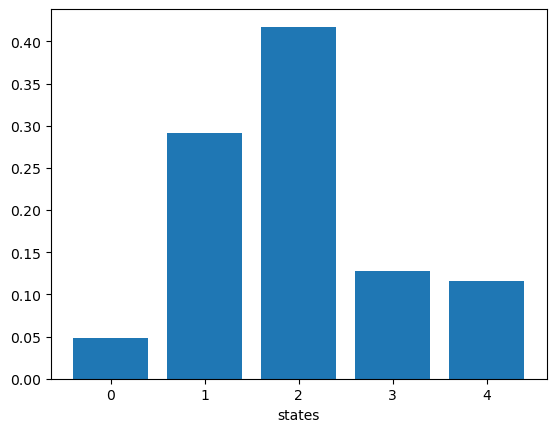

In [12]:
x = np.linspace(0,len(p_out)-1,len(p_out))

plt.xlabel("states")

plt.bar(x,p_out)